In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

tf.random.set_seed(777)

print(tf.__version__)

2022-04-26 15:50:15.530183: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


2.3.0


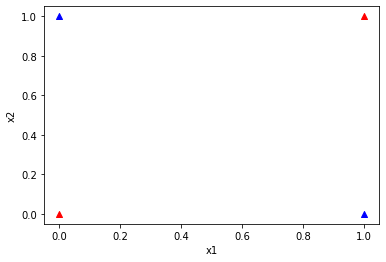

In [2]:
x_data = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]
y_data = [
    [0],
    [1],
    [1],
    [0]
]

plt.scatter(x_data[0][0], x_data[0][1], c="red", marker="^")
plt.scatter(x_data[3][0], x_data[3][1], c="red", marker="^")
plt.scatter(x_data[1][0], x_data[1][1], c="blue", marker="^")
plt.scatter(x_data[2][0], x_data[2][1], c="blue", marker="^")

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [3]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

def preprocess_data(features, labels):
    features = tf.cast(features, tf.float32)
    labels = tf.cast(labels, tf.float32)
    return features, labels

2022-04-26 15:50:16.783642: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-04-26 15:50:16.866127: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:03:00.0 name: GeForce RTX 2080 computeCapability: 7.5
coreClock: 1.71GHz coreCount: 46 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.23GiB/s
2022-04-26 15:50:16.866728: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 1 with properties: 
pciBusID: 0000:04:00.0 name: GeForce RTX 2080 computeCapability: 7.5
coreClock: 1.71GHz coreCount: 46 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.23GiB/s
2022-04-26 15:50:16.866748: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-04-26 15:50:16.868190: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2022-04

In [4]:
W1 = tf.Variable(tf.random.normal((2, 1)), name="weight1")
b1 = tf.Variable(tf.random.normal((1, )), name="bias1")

W2 = tf.Variable(tf.random.normal((2, 1)), name="weight2")
b2 = tf.Variable(tf.random.normal((1, )), name="bias2")

W3 = tf.Variable(tf.random.normal((2, 1)), name="weight3")
b3 = tf.Variable(tf.random.normal((1, )), name="bias3")

In [5]:
def neural_net(features):
    layer1 = tf.sigmoid(tf.matmul(features, W1) + b1)
    layer2 = tf.sigmoid(tf.matmul(features, W2) + b2)
    layer3 = tf.concat([layer1, layer2], -1)
    layer3 = tf.reshape(layer3, shape = [-1, 2])
    hypothesis = tf.sigmoid(tf.matmul(layer3, W3) + b3)
    return hypothesis

def loss_function(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

def accuracy_function(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_function(neural_net(features), labels)
    return tape.gradient(loss_value, [W1, W2, W3, b1, b2, b3])

In [6]:
EPOCHS = 50000

for step in range(EPOCHS):
    for features, labels in dataset:
        features, labels = preprocess_data(features, labels)
        grads = grad(neural_net(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W1, W2, W3, b1, b2, b3]))
        if step % 5000 == 0:
            print("Iter : {}, Loss : {:.4f}".format(step, loss_function(neural_net(features), labels)))

x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_function(neural_net(x_data), y_data)
print("Testset Accuracy : {:.4f}".format(test_acc))

Iter : 0, Loss : 0.8487
Iter : 5000, Loss : 0.6847
Iter : 10000, Loss : 0.6610
Iter : 15000, Loss : 0.6154
Iter : 20000, Loss : 0.5722
Iter : 25000, Loss : 0.5433
Iter : 30000, Loss : 0.5211
Iter : 35000, Loss : 0.4911
Iter : 40000, Loss : 0.4416
Iter : 45000, Loss : 0.3313
Testset Accuracy : 1.0000
